## Dimensionality Reduction

Goal of DR:

* Given a set of samples from some N-dimensional feature space
* Re-encode the samples into a smaller M-dimensional space

Challenge:
* No Labels

Approaches:

* Projection : Linear transformation of a point in N space onto a nearby M-dimensional manifold (where M << N)

* Warping space, followed by projection

* Identify samples that are "near" one-another in the N-dimensional feature space

* Find a way to embed corresponding points into an M-dimensional space that respects this "nearness"

* Again: M << N


Label-spreading

In [15]:
import pandas as pd
import numpy as np
import os
import fnmatch
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA, KernelPCA
from numpy import random

from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import MDS, Isomap, TSNE
from sklearn.semi_supervised import LabelPropagation, LabelSpreading

FIGSIZE = (10,6)
FONTSIZE = 10

In [16]:
def scatter_plot(ins, pred=None, centers = None, cmap = plt.cm.brg):
    fig, ax = plt.subplots(figsize=FIGSIZE)
    if pred is None:
        ax.plot(ins[:,0], ins[:,1], c = pred, s = 5, cmap = cmap)
    else:
        ax.scatter(ins[:,0], ins[:,1], c = pred, s = 5, cmap = cmap)
    if centers is not None:
        mn = np.min(pred)
        mx = np.max(pred)
        print(np.arange(mn, mx+1))
        ax.scatter(
            centers[:,0], 
            centers[:,1], 
            c = np.arange(mn, mx+1), 
            marker = "D",
            s = 100,
            cmap = cmap
        )

In [20]:
offset = 1
sparcity = 0.005

# Sample time
t = np.arange(-1,1, sparcity)
x0 = t

x1 = np.cos(t*10) + 0.1*random.normal(size = (len(t)))
x2 = np.cos(t*10) + 0.1*random.normal(size = (len(t))) +offset

# Labels
y = np.append(np.zeros(x1.shape), np.ones(x2.shape))

# Collapse into a matrix
X0 = np.append(x0,x0).reshape(-1,1)
X1 = np.append(x1,x2).reshape(-1,1)

x = np.concatenate([X0, X1], axis =1)
x.shape

(800, 2)

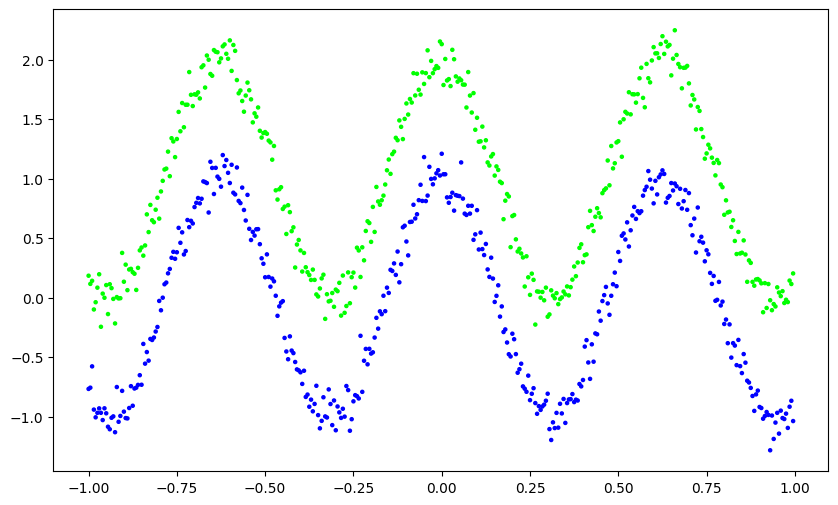

In [21]:
scatter_plot(x,y)

In [22]:
p = 0.9

y_corrupt = np.array([-1 if random.random() < p else v for v in y])

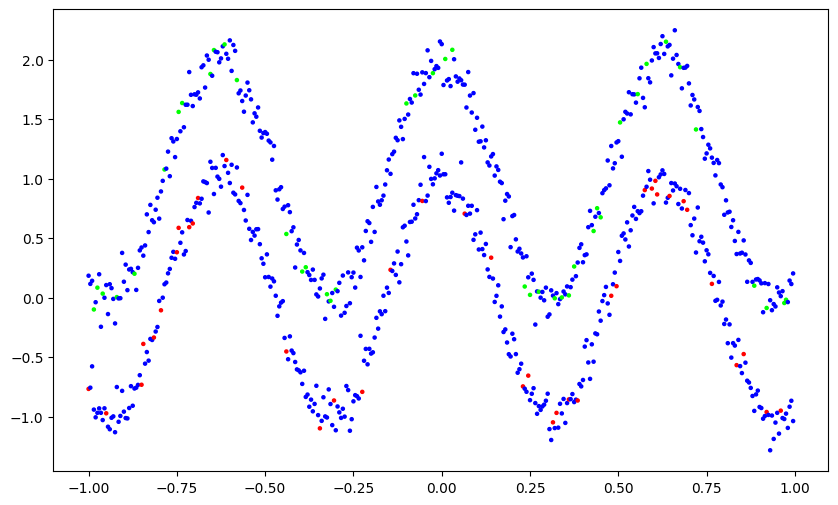

In [23]:
scatter_plot(x, y_corrupt)

In [30]:
model = LabelSpreading(
    kernel = "rbf",
    n_jobs = -1,
    max_iter = 10_000,
    gamma = 1000,
)

In [31]:
model.fit(x, y_corrupt)
pred = model.predict(x)

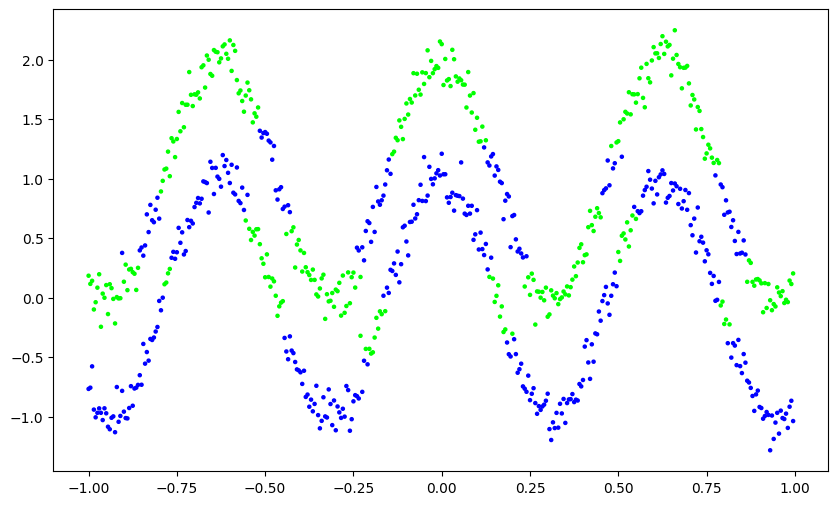

In [32]:
scatter_plot(x,pred)

Embedded-Based Methods

In [ ]:
def plot_3d(ins, pred):
    fig = plt.figure(figsize=FIGSIZE)
    ax = fig.gca(projection = "3d")
    ax.plot_trisurf(ins[:,0], ins[:,1], pred, cmap = plt.cm.jet)